# Introduction
This project analyzes data from on-line dating application OKCupid.
The goal of this project is to scope, prep, analyze data, and create a machine learning model.

#### Project Goals
According to the data, many users (23.49%) have not input their drug usage status, but it might be important for people to match a person with a similar lifestyle. The goal of this project is to find out whether it can be predicted if a certain user consumes drugs so this could be used to get better matches in future.

#### Data
The project has one dataset called profiles.csv provided by Codecademy. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

#### Analysis
This proect will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project is to make predictions on the user's drug usage, classification algorithms from the supervised learning family of machine learning models will be implemented.

#### Evaluation
The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through accuracy, precision, recall and F1 scores.

### Loading the Data
Loading and examining the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('profiles.csv')
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

# Exploring the Data

After exploring the dataset, eight features were selected to build a model. The rest of the features were dropped due to the reasons of heterogeneity, lack of information or little variance. The target is 'drugs' column, which contains three unique options: 'often', 'sometimes' and 'never'.
The null values in the 'job' column were filled with 'rather not say', which is semantically identical.

In [4]:
drugs_data = data[['age', 'body_type', 'drinks', 'orientation', 'job', 'sex', 'smokes', 'status', 'drugs']]
drugs_data.job = drugs_data.job.fillna('rather not say')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Drugs and Age
The following plot shows the distribution af age among three groups of the users classified by frequency of drug usage. The median age of those who often consume drugs (25 y.o.) is less than of those who never consume drugs (30 y.o.).

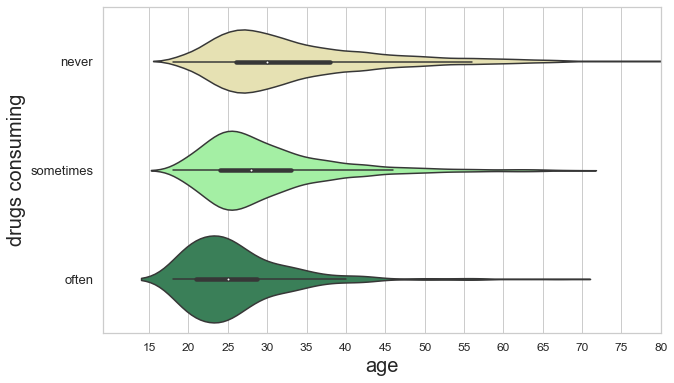

In [5]:
plt.figure(figsize=(10, 6))
my_pal = {'never': 'palegoldenrod', 'sometimes': 'palegreen', 'often': 'seagreen'}
sns.set(style="whitegrid")
ax = sns.violinplot(data=drugs_data, x='age', y='drugs', palette=my_pal)
ax.set_xticks(np.arange(15, 85, 5))
ax.set_xticklabels(np.arange(15, 85, 5), fontsize=12)
ax.set_yticklabels(['never', 'sometimes', 'often'], fontsize=13)
plt.xlabel('age', fontsize=20)
plt.ylabel('drugs consuming', fontsize=20)
plt.xlim(right=80)
plt.show()
plt.close()

In [6]:
print('Medians:')
print('often', np.median(drugs_data.age[drugs_data.drugs == 'often']))
print('sometimes', np.median(drugs_data.age[drugs_data.drugs == 'sometimes']))
print('never', np.median(drugs_data.age[drugs_data.drugs == 'never']))

Medians:
often 25.0
sometimes 28.0
never 30.0


### Drugs and Gender
The next plot shows the distribution of gender. Among users who often consume drugs, males significantly prevail over females (69% and 31% respectively). Among those who never consume drugs, the difference is not so sharp (58% and 42% respectively).

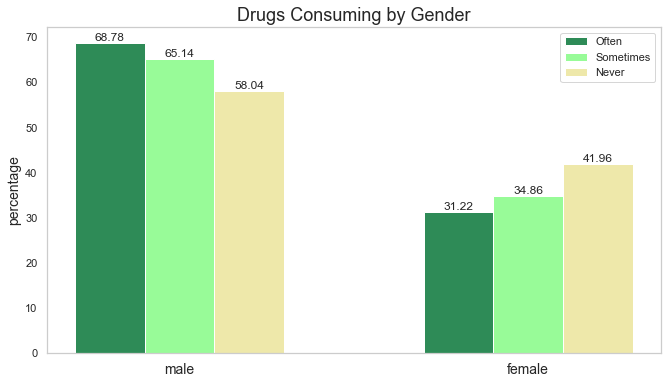

In [7]:
labels = ['Men', 'Women']
x = np.arange(len(labels))
width = 0.2
often_sex = round((drugs_data.sex[drugs_data.drugs == 'often'].value_counts(normalize=True))*100, 2)
sometimes_sex = round((drugs_data.sex[drugs_data.drugs == 'sometimes'].value_counts(normalize=True))*100, 2)
never_sex = round((drugs_data.sex[drugs_data.drugs == 'never'].value_counts(normalize=True))*100, 2)

fig, ax = plt.subplots(figsize=(11, 6))
rects1 = ax.bar(x - width, often_sex, width, label='Often', color='seagreen')
rects2 = ax.bar(x, sometimes_sex, width, label='Sometimes', color='palegreen')
rects3 = ax.bar(x + width, never_sex, width, label='Never', color='palegoldenrod')
ax.set_ylabel('percentage', fontsize=14)
ax.set_title('Drugs Consuming by Gender', fontsize=18)
ax.grid(False)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 80, 10))
ax.set_xticklabels(['male', 'female'], fontsize=14)
for container in ax.containers:
    ax.bar_label(container)
ax.legend()
plt.show()
fig.tight_layout()
plt.close()

### Drugs and Drinking
The following plot displays the distribution of drinking habits among three groups of the users. People who never consume drugs tend to drink less than those who consume drugs often. Percent of people drinking 'socially', 'rarely' or 'not at all' is higher among those who never consumes drugs. At the same time percent of people drinking 'often', 'very often' and 'desperately' is dramatically higher among users who often consume drugs comparing to those who never consume drugs.

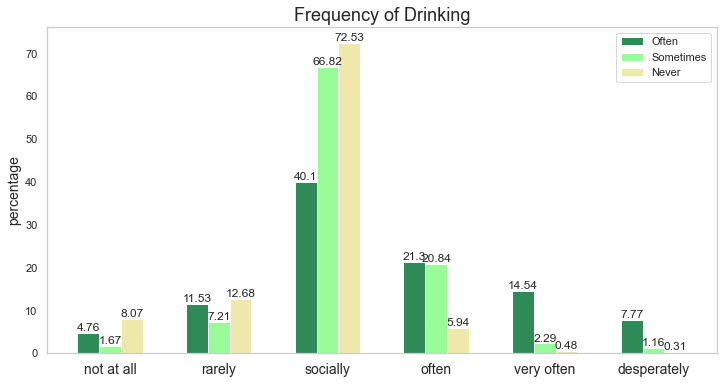

In [8]:
labels = ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately']
x = np.arange(len(labels))
width = 0.2

often_drinks = round((drugs_data.drinks[drugs_data.drugs == 'often'].value_counts(normalize=True))*100, 2)
sometimes_drinks = round((drugs_data.drinks[drugs_data.drugs == 'sometimes'].value_counts(normalize=True))*100, 2)
never_drinks = round((drugs_data.drinks[drugs_data.drugs == 'never'].value_counts(normalize=True))*100, 2)

often_drinks_sorted = []
sometimes_drinks_sorted = []
never_drinks_sorted = []
for label in labels:
    often_drinks_sorted.append(often_drinks[label])
    sometimes_drinks_sorted.append(sometimes_drinks[label])
    never_drinks_sorted.append(never_drinks[label])

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, often_drinks_sorted, width, label='Often', color='seagreen')
rects2 = ax.bar(x, sometimes_drinks_sorted, width, label='Sometimes', color='palegreen')
rects3 = ax.bar(x + width, never_drinks_sorted, width, label='Never', color='palegoldenrod')
ax.set_ylabel('percentage', fontsize=14)
ax.set_title('Frequency of Drinking', fontsize=18)
ax.grid(False)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 80, 10))
ax.set_xticklabels(labels, fontsize=14)
for container in ax.containers:
    ax.bar_label(container)
ax.legend()
plt.show()
fig.tight_layout()
plt.close()

### Drugs and Smoking
The next plot shows the distribution of smoking habits among the users. The majority of people who never consume drugs do not smoke either. Among those who often consume drugs 38% of people smoke, 29% of people do not smoke and the rest smoke from time to time.

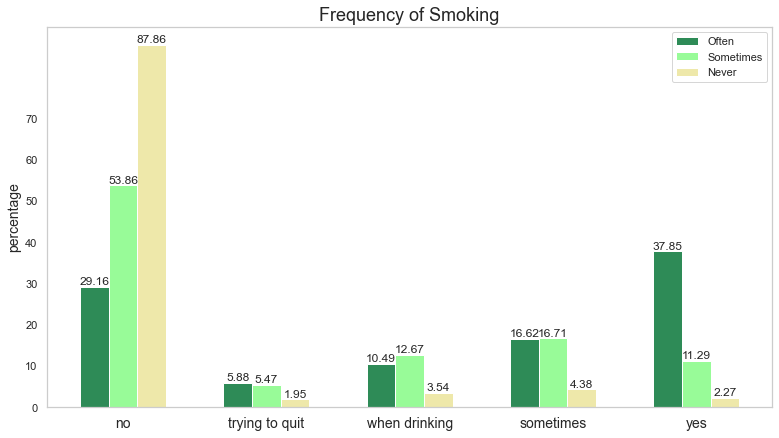

In [9]:
labels = ['no', 'trying to quit', 'when drinking', 'sometimes', 'yes']
x = np.arange(len(labels))
width = 0.2

often_smokes = round((drugs_data.smokes[drugs_data.drugs == 'often'].value_counts(normalize=True))*100, 2)
sometimes_smokes = round((drugs_data.smokes[drugs_data.drugs == 'sometimes'].value_counts(normalize=True))*100, 2)
never_smokes = round((drugs_data.smokes[drugs_data.drugs == 'never'].value_counts(normalize=True))*100, 2)

often_smokes_sorted = []
sometimes_smokes_sorted = []
never_smokes_sorted = []
for label in labels:
    often_smokes_sorted.append(often_smokes[label])
    sometimes_smokes_sorted.append(sometimes_smokes[label])
    never_smokes_sorted.append(never_smokes[label])
    
fig, ax = plt.subplots(figsize=(13, 7))
rects1 = ax.bar(x - width, often_smokes_sorted, width, label='Often', color='seagreen')
rects2 = ax.bar(x, sometimes_smokes_sorted, width, label='Sometimes', color='palegreen')
rects3 = ax.bar(x + width, never_smokes_sorted, width, label='Never', color='palegoldenrod')
ax.set_ylabel('percentage', fontsize=14)
ax.set_title('Frequency of Smoking', fontsize=18)
ax.grid(False)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 80, 10))
ax.set_xticklabels(labels, fontsize=14)
for container in ax.containers:
    ax.bar_label(container)
ax.legend()
plt.show()
fig.tight_layout()
plt.close()

### Missing Data
Checking for missing data in the dataset:

In [10]:
drugs_filled = drugs_data[~drugs_data.drugs.isnull()]
drugs_filled.info()
drugs_null = drugs_data[drugs_data.drugs.isnull()]
drugs_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45866 entries, 0 to 59944
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45866 non-null  int64 
 1   body_type    42275 non-null  object
 2   drinks       44253 non-null  object
 3   orientation  45866 non-null  object
 4   job          45866 non-null  object
 5   sex          45866 non-null  object
 6   smokes       43117 non-null  object
 7   status       45866 non-null  object
 8   drugs        45866 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14080 entries, 2 to 59945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          14080 non-null  int64 
 1   body_type    12375 non-null  object
 2   drinks       12708 non-null  object
 3   orientation  14080 non-null  object
 4   job          14080 non-null  obj

As shown above, the dataset to be used for prediction ('drugs_null') contains null values. Now it should be checked if they are missing at random or not.

In [11]:
print(drugs_data.drugs.value_counts(normalize=True))
print(drugs_data.drugs.isnull().value_counts(normalize=True))

never        0.822483
sometimes    0.168578
often        0.008939
Name: drugs, dtype: float64
False    0.765122
True     0.234878
Name: drugs, dtype: float64


In [12]:
print('body_type')
print(drugs_data.drugs[drugs_data.body_type.isnull()].value_counts(normalize=True))
print(drugs_data[drugs_data.body_type.isnull()].drugs.isnull().value_counts(normalize=True))
print('\ndrinks')
print(drugs_data.drugs[drugs_data.drinks.isnull()].value_counts(normalize=True))
print(drugs_data[drugs_data.drinks.isnull()].drugs.isnull().value_counts(normalize=True))
print('\nsmokes')
print(drugs_data.drugs[drugs_data.smokes.isnull()].value_counts(normalize=True))
print(drugs_data[drugs_data.smokes.isnull()].drugs.isnull().value_counts(normalize=True))

body_type
never        0.805904
sometimes    0.186856
often        0.007240
Name: drugs, dtype: float64
False    0.678059
True     0.321941
Name: drugs, dtype: float64

drinks
never        0.944203
sometimes    0.048977
often        0.006820
Name: drugs, dtype: float64
False    0.540369
True     0.459631
Name: drugs, dtype: float64

smokes
never        0.841033
sometimes    0.152055
often        0.006912
Name: drugs, dtype: float64
True     0.50127
False    0.49873
Name: drugs, dtype: float64


Distribution of responses ('often', 'sometimes', 'never') and percent of null values is different depending on the feature where the data is missing and does not coincide with the mean percentage of responses and missing data. This fact means that data is missing not at random at can not be just dropped, so for the purposes of the analysis it will be filled with 'MissingValue'.

In [13]:
drugs_data[['body_type', 'drinks', 'smokes']] = drugs_data[['body_type', 'drinks', 'smokes']].fillna('MissingValue')
drugs_filled = drugs_data[~drugs_data.drugs.isnull()]
drugs_null = drugs_data[drugs_data.drugs.isnull()]
x = drugs_filled.drop(columns=['drugs'])
y = drugs_filled.drugs

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# Model Building
Four different machine learning models is used in this project: Logistic Regression, K-Nearest Neighbors Classifier, Support Vector Classifier and Random Forest Classifier.

In [14]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [15]:
num_col_selector = selector(dtype_exclude=object)
cat_col_selector = selector(dtype_include=object)
num_columns = num_col_selector(x)
cat_columns = cat_col_selector(x)
preprocessor = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), cat_columns), 
    ('standard-scaler', StandardScaler(), num_columns)])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

### Logistic Regression

In [17]:
model_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=500, multi_class="multinomial")).fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

       never       0.86      0.97      0.91      7555
       often       0.00      0.00      0.00        82
   sometimes       0.56      0.23      0.33      1537

    accuracy                           0.84      9174
   macro avg       0.47      0.40      0.41      9174
weighted avg       0.80      0.84      0.80      9174



### K-Nearest Neighbors

In [18]:
model_knn = make_pipeline(preprocessor, KNeighborsClassifier()).fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       never       0.85      0.95      0.90      7555
       often       0.12      0.01      0.02        82
   sometimes       0.46      0.23      0.30      1537

    accuracy                           0.82      9174
   macro avg       0.48      0.40      0.41      9174
weighted avg       0.78      0.82      0.79      9174



### Support Vector Classifier

In [19]:
model_svc = make_pipeline(preprocessor, SVC()).fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

       never       0.85      0.97      0.91      7555
       often       0.00      0.00      0.00        82
   sometimes       0.57      0.20      0.30      1537

    accuracy                           0.84      9174
   macro avg       0.48      0.39      0.40      9174
weighted avg       0.80      0.84      0.80      9174



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [20]:
model_rf = make_pipeline(preprocessor, RandomForestClassifier()).fit(x_train, y_train)
y_pred_rf = model_svc.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       never       0.85      0.97      0.91      7555
       often       0.00      0.00      0.00        82
   sometimes       0.57      0.20      0.30      1537

    accuracy                           0.84      9174
   macro avg       0.48      0.39      0.40      9174
weighted avg       0.80      0.84      0.80      9174



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It seems that Logistic Regression is the best model in this case, so it is used below to predict drug consuming status of the users. The updated dataset with predicted values in the 'drugs' column is saved as 'data_upd'.

In [21]:
predicted = model_lr.predict(drugs_null.drop(columns='drugs'))
data_upd = data.copy()
for row in range(len(data_upd)):
    i = 0
    if data_upd['drugs'][row] not in ['never', 'sometimes', 'often'] :
        data_upd['drugs'][row] = predicted[i]
        i += 1
    else:
        pass

C:\Users\user\AppData\Local\Temp/ipykernel_8680/2903496967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_upd['drugs'][row] = predicted[i]


# Conclusion
In this project machine learning was used to predict the drug usage status of OkCupid users. This is an important feature since people prefer to match with someone with similar attitude towards drugs. If users do not input their drug usage status, the algorithm can generate this value to impute missing data when making matches.